In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread

<IPython.core.display.Javascript object>


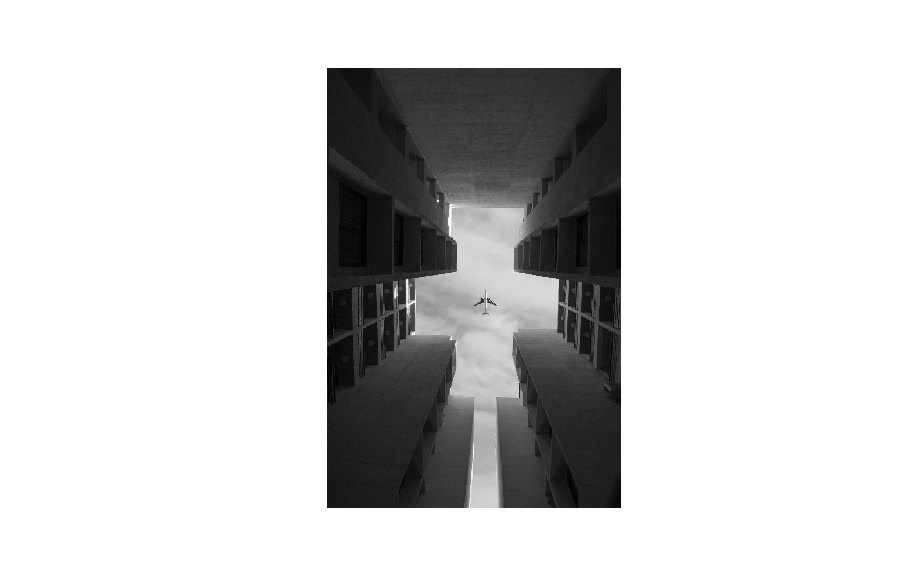

In [3]:
im = imread('airplane.jpg')

plt.figure()
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


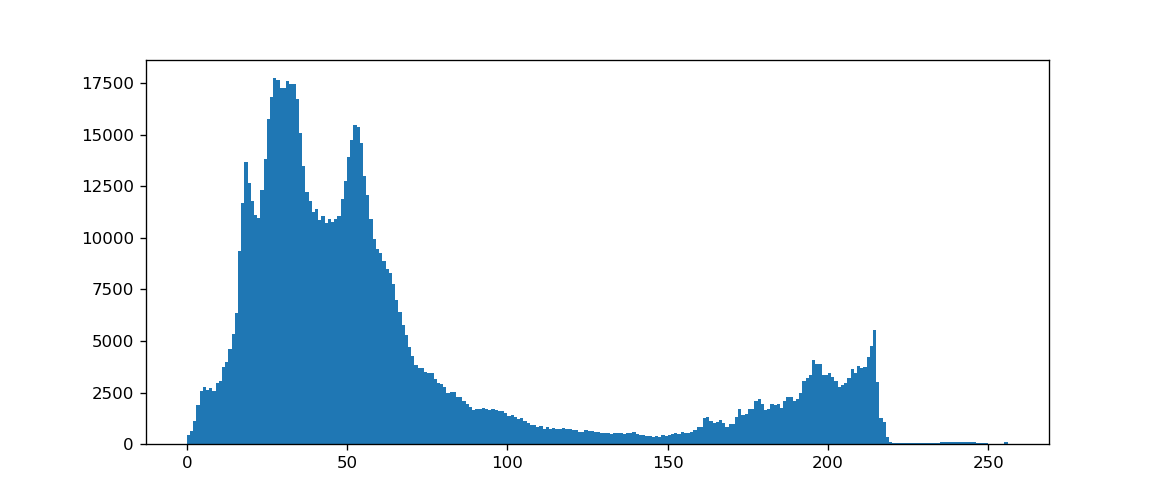

In [4]:
plt.figure()
plt.hist(im.flatten(), bins=np.arange(257))
plt.show()

## Optimal threshold algorithm:

Given an histogram $H = \{h_i\}, i \in [0,255]$ and an initial threshold $t \in [0,255]$:

* Cut the distribution in two parts: $H_{1} = {h_i}, i \in [0,t[$ and $H_{2} = {h_i}, i \in [t,255]$
* Compute the centroids: $m_1 = \frac{\sum_{i=0}^{t-1}{h_i * i}}{\sum_{i=0}^{t-1}{h_i}}$, $m_2 = \frac{\sum_{i=t}^{255}{h_i * i}}{\sum_{i=t}^{255}{h_i}}$
* Compute the new threshold: $t_{new} = \frac{m1+m2}{2}$
* Iterate until $t_{new} = t$.

In [9]:
def optimal_threshold(h,t):
    # Cut distribution in 2
    h1 = h[:t]
    h2 = h[t:]
    
    # Compute the centroids
    m1 = (h1*np.arange(0,t)).sum()/h1.sum()
    m2 = (h2*np.arange(t,len(h))).sum()/h2.sum()
    
    # Compute the new threshold
    t2 = int(np.round((m1+m2)/2))
    print(m1,m2,t2)
    
    if( t2 != t ) : return optimal_threshold(h,t2)
    return t2

h,bins = np.histogram(im,range(257))
t = optimal_threshold(h,240)
print(t)

67.97246560416244 245.48888888888888 157
45.81617271349327 194.79630569087612 120
43.60119368139627 187.89667799516243 116
43.32364932456779 186.63467158991136 115
43.25549460250202 186.31132064176245 115
115


<IPython.core.display.Javascript object>


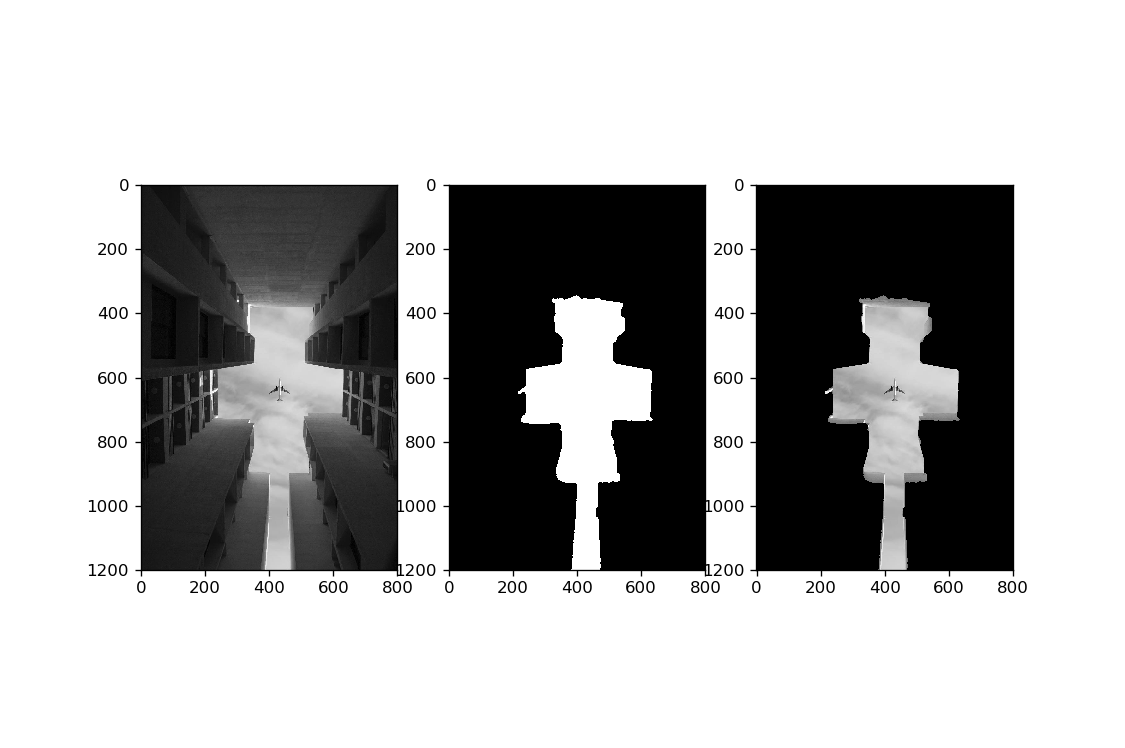

In [11]:
from skimage.morphology import opening,closing,disk

mask = im>t
mask = closing(opening(mask, disk(5)),disk(7))

im_m = im.copy()
im_m[mask==False] = 0

plt.figure()
plt.subplot(1,3,1)
plt.imshow(im, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(im_m, cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


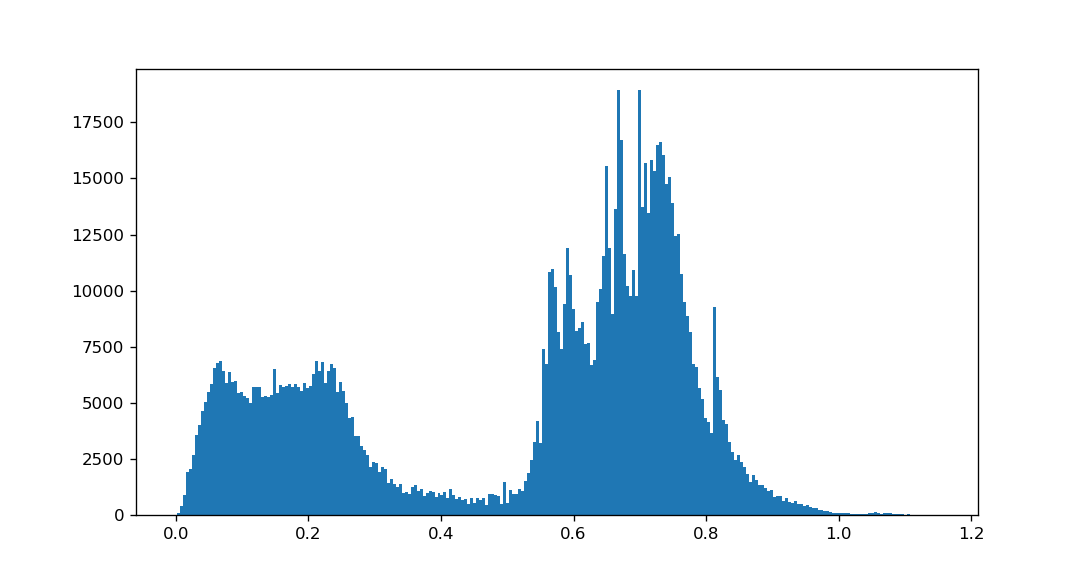

In [12]:
from skimage.color import rgb2hsv

def distance_color_space(im, coords):
    refcolor = im[coords[0],coords[1]]
    dmap = np.sqrt(((im-refcolor)**2).sum(axis=2))
    return dmap

im = imread('etretat.jpg')
hsv = rgb2hsv(im)

coords = (200,600)

dmap = distance_color_space(hsv.astype('float'), coords)
h,bins = np.histogram(dmap.flatten(),bins=256)

plt.figure()
plt.bar(bins[:-1],h,bins[1]-bins[0])
plt.show()

In [13]:
b = optimal_threshold(h,127)
t = (bins[b]+bins[b+1])/2
print(t)

51.57976091340165 156.81519536835634 104
39.5778866340098 153.5479349575135 97
38.786211522573154 153.18817428171252 96
38.67977380757253 153.13362467434237 96
0.43545112783247764


<IPython.core.display.Javascript object>


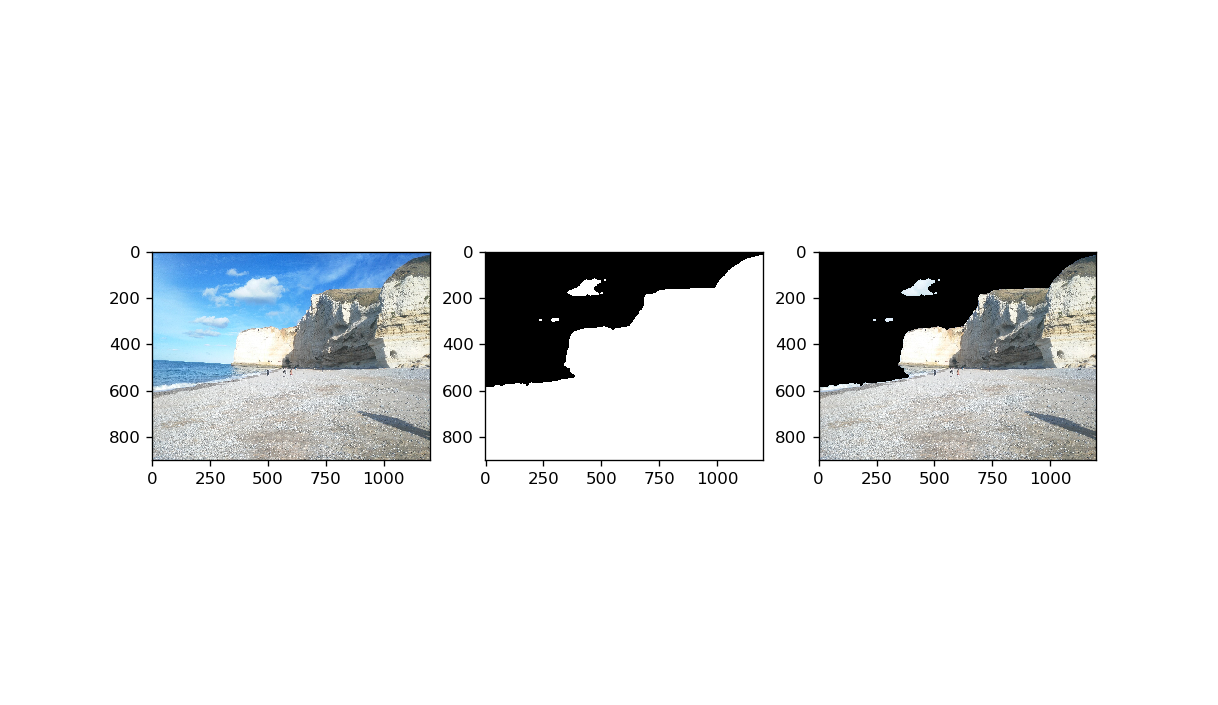

In [14]:
mask = dmap>t
mask = closing(opening(mask, disk(5)),disk(5))

im_m = im.copy()
im_m[mask==False] = 0

plt.figure()
plt.subplot(1,3,1)
plt.imshow(im, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(im_m, cmap=plt.cm.gray)
plt.show()